## Análise Exploratória de Dados (EDA) - PProductions

In [2314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2315]:
imdb_data = pd.read_csv(r'C:\Users\User\Downloads\desafio_indicium_imdb.csv')

In [2316]:
#Remoção de coluna desnecessária
imdb_data.drop(columns=['Unnamed: 0'], inplace=True)

In [2317]:
imdb_data.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [2318]:
imdb_data.tail()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
994,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
998,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


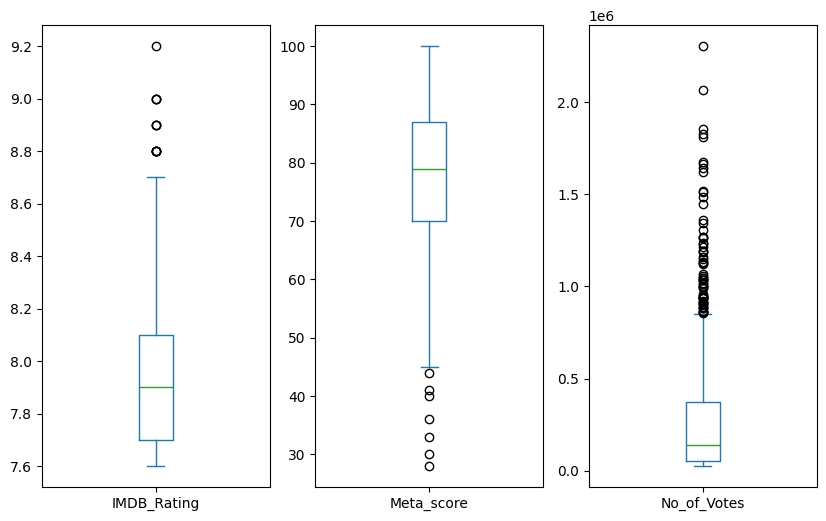

In [2319]:
imdb_data.plot(kind='box', figsize=(10,6),subplots=True);

## Limpeza de Dados
Nessa etapa inicial realizaremos uma limpeza de dados para evitar possíveis problemas durante nossa análise.
Alguns dos procedimentos a serem realizados serão:
- Preenchimento de valores em branco na coluna 'Certificate' para 'Not Rated';
- Preenchimento de valores em branco na coluna 'Meta_score' pelo cálculo da mediana;
- Remoção dos valores na coluna 'Gross' para evitar complicações nos cálculos de faturamento

In [2321]:
# Counting the amount of null values on each column
null_values = imdb_data.isnull().sum()
null_values

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [2322]:
# Substituindo valores em branco na coluna "Certificate" por "Not Rated"
imdb_data['Certificate'].fillna('Not Rated', inplace=True)

In [2323]:
# Substituindo os valores em branco na coluna "Meta_score" pelo cálculo da mediana.
meta_score_median = imdb_data['Meta_score'].median()
imdb_data['Meta_score'].fillna(meta_score_median, inplace=True)

# Retirando valores em branco na coluna "Gross"
imdb_data.dropna(subset=['Gross'], inplace=True)

# Formatação na coluna 'Gross'
imdb_data['Gross'] = imdb_data['Gross'].str.replace(',', '')
imdb_data['Gross'] = pd.to_numeric(imdb_data['Gross'], errors='coerce')

# Formatação na coluna 'Runtime'
imdb_data['Runtime'] = imdb_data['Runtime'].str.replace(' min', '')
imdb_data['Runtime'] = pd.to_numeric(imdb_data['Runtime'], errors='coerce')

In [2324]:
# Verificar se ainda existem valores nulos
null_values_after = imdb_data.isnull().sum()
null_values_after

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

## Análise Descritiva dos Dados

In [2326]:
imdb_data.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,830.000000,830.000000,830.000000,8.300000e+02,8.300000e+02
mean,124.056627,7.945301,77.607229,3.128067e+05,6.808257e+07
std,27.510988,0.279446,11.884342,3.365523e+05,1.098076e+08
min,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,104.000000,7.700000,71.000000,7.140450e+04,3.245338e+06
50%,120.000000,7.900000,79.000000,1.858500e+05,2.345744e+07
75%,138.000000,8.100000,85.750000,4.434590e+05,8.087634e+07
max,242.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


## Análise de variáveis quantitativas
Faremos análises gráficas de variáveis quantitativas, como faturamento, votos e classificação no IMDB.

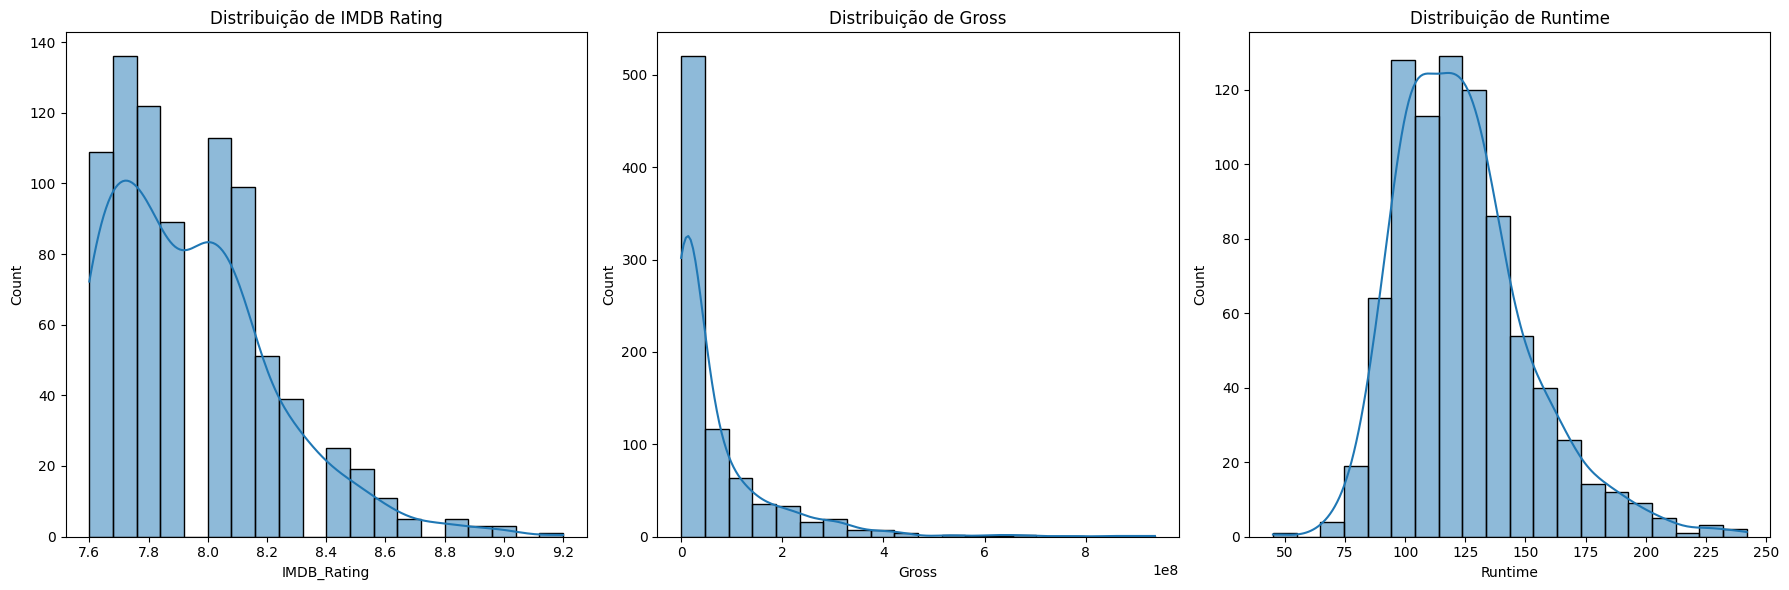

In [2328]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(imdb_data['IMDB_Rating'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribuição de IMDB Rating')
sns.histplot(imdb_data['Gross'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribuição de Gross')
sns.histplot(imdb_data['Runtime'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribuição de Runtime')
plt.tight_layout()
plt.show()

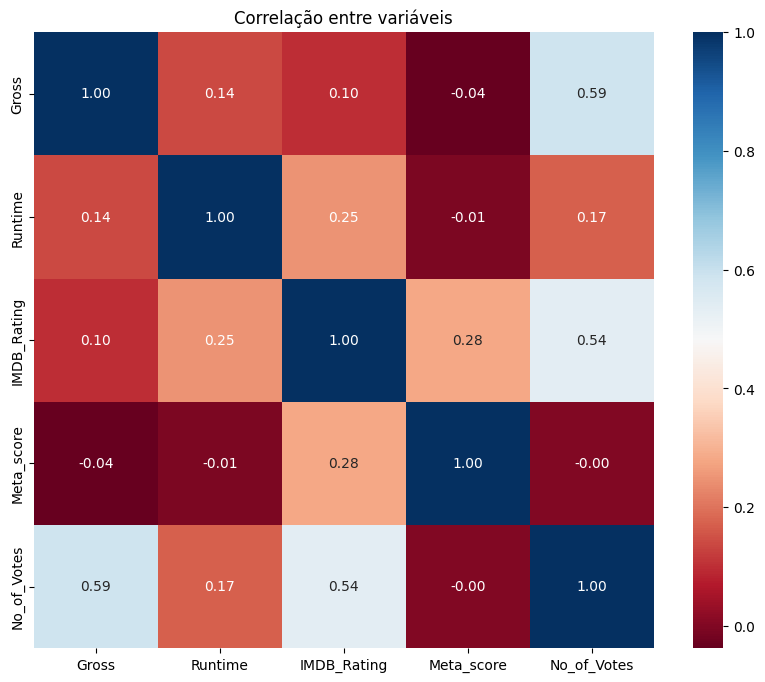

In [2329]:
# Selecionar as variáveis quantitativas
quantitative_vars = ['Gross', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes']

# Calcular a correlação entre as variáveis quantitativas
corr_matrix = imdb_data[quantitative_vars].corr()

# Criar um heatmap das correlações
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt='.2f')
plt.title('Correlação entre variáveis')
plt.show()

Analisando o gráfico acima, podemos ver que a correlação entre 'Gross' e "No_of_Votes" é significamente positiva, nos levando a crer que **filmes mais populares tendem a ter maior expectativa de faturamento.**

## Análise de variáveis categóricas

Nessa etapa realizaremos a análise de variáveis categóricas como Gênero, Diretor e Elenco sobre filmes que são considerados acima da média de faturamento.

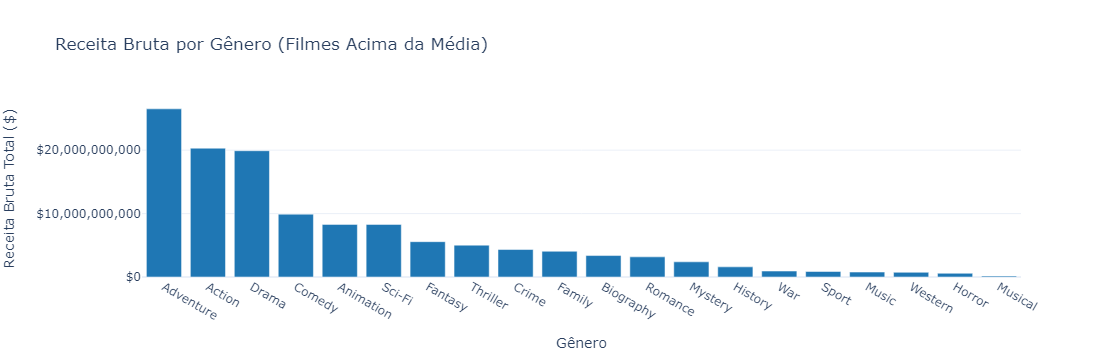

In [2332]:
# Filtrar filmes com faturamento acima da média
above_average_gross_movies = imdb_data[imdb_data['Gross'] > average_gross]

# Dividindo os gêneros e criando um dataframe separado para análise de receita bruta por gênero
genres_gross_above_avg_df = above_average_gross_movies['Genre'].str.get_dummies(sep=', ').mul(above_average_gross_movies['Gross'], axis=0)
total_gross_by_genre_above_avg = genres_gross_above_avg_df.sum().sort_values(ascending=False)

# Criando um DataFrame para a receita bruta por gênero para filmes acima da média
gross_by_genre_above_avg_df = total_gross_by_genre_above_avg.reset_index()
gross_by_genre_above_avg_df.columns = ['Gênero', 'Receita Bruta Total']

# Criando o gráfico interativo para receita bruta com plotly
graph_above_avg = px.bar(gross_by_genre_above_avg_df, x='Gênero', y='Receita Bruta Total', title='Receita Bruta por Gênero (Filmes Acima da Média)',
                         labels={'Receita Bruta Total': 'Receita Bruta Total ($)'},
                         template='plotly_white',
                         color_discrete_sequence=['#1f77b4'])

# Formatando o eixo Y para mostrar valores em formato monetário
graph_above_avg.update_layout(yaxis_tickformat='$,.0f')

# Mostrar o gráfico
graph_above_avg.show()

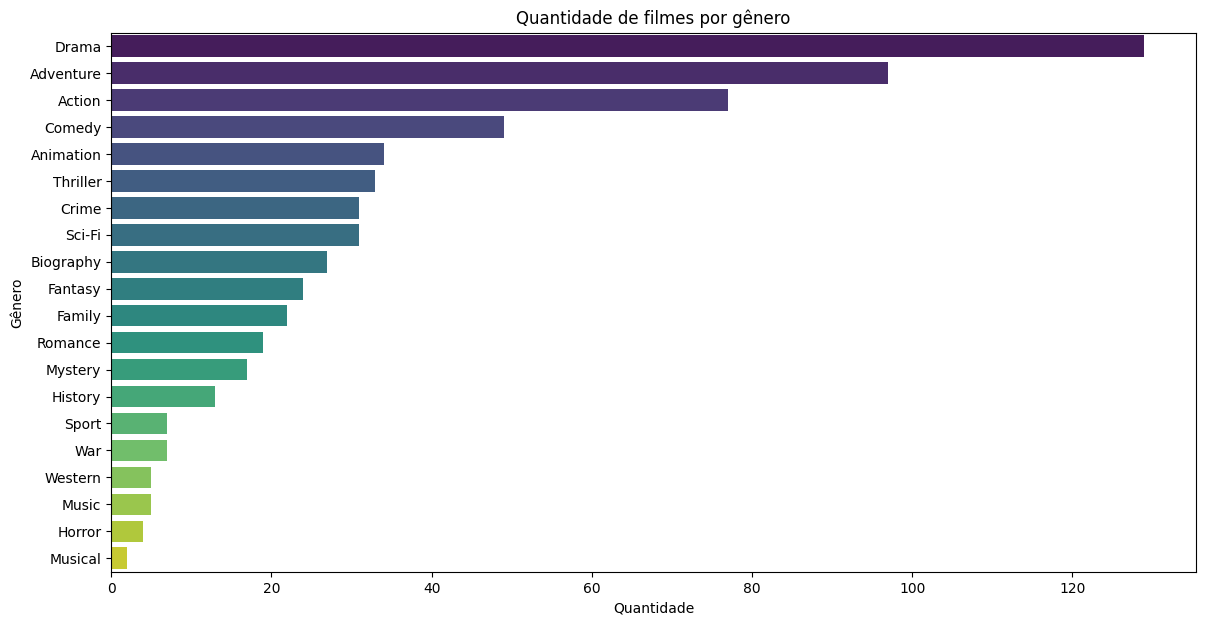

In [2333]:
# Calcular a média de receita bruta
average_gross = imdb_data['Gross'].mean()

# Filtrar filmes com receita bruta acima da média
above_average_gross_movies = imdb_data[imdb_data['Gross'] > average_gross]

# Plotar a distribuição de gêneros
plt.figure(figsize=(14, 7))
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.index, palette='viridis', dodge=False, legend=False)
plt.title('Quantidade de filmes por gênero')
plt.xlabel('Quantidade')
plt.ylabel('Gênero')
plt.show()

## Como a combinação de gênero afeta o faturamento de um filme?
**Vamos analisar se filmes que combinam gêneros são mais lucrativos!**

In [2335]:
# Criar coluna indicando múltiplos gêneros
imdb_data['Multiple_Genres'] = imdb_data['Genre'].str.contains(',').astype(int)

In [2336]:
# Calcular a média de receita bruta para filmes com um único gênero e múltiplos gêneros
average_gross_single_genre = imdb_data[imdb_data['Multiple_Genres'] == 0]['Gross'].mean()
average_gross_multiple_genres = imdb_data[imdb_data['Multiple_Genres'] == 1]['Gross'].mean()

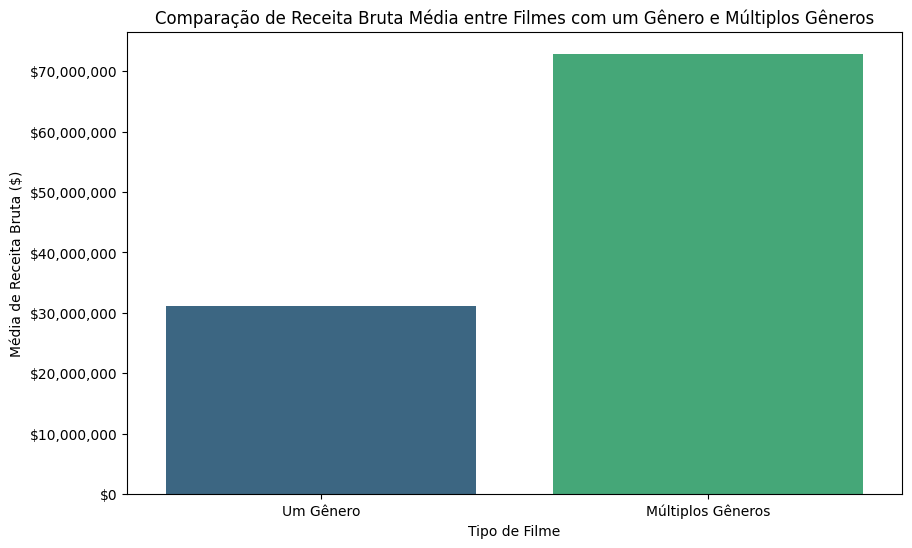

In [2337]:
# Criar um DataFrame para comparação
comparison_df = pd.DataFrame({
    'Tipo': ['Um Gênero', 'Múltiplos Gêneros'],
    'Média de Receita Bruta': [average_gross_single_genre, average_gross_multiple_genres]
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=comparison_df, x='Tipo', y='Média de Receita Bruta', hue='Tipo', dodge=False, palette='viridis', legend=False)
plt.title('Comparação de Receita Bruta Média entre Filmes com um Gênero e Múltiplos Gêneros')
plt.xlabel('Tipo de Filme')
plt.ylabel('Média de Receita Bruta ($)')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

plt.show()

E com o gráfico acima percebemos que filmes que combinam gêneros possuem quase o **dobro de faturamento** de um filme de único gênero!

### Analisando Diretores e Protagonistas
Vamos ver como diretores e protagonistas e seus impactos nos filmes!

In [2340]:
# Analisar diretores
top_directors = above_average_gross_movies['Director'].value_counts().head(10)

# Analisar atores principais (Star1)
top_actors = above_average_gross_movies['Star1'].value_counts().head(10)

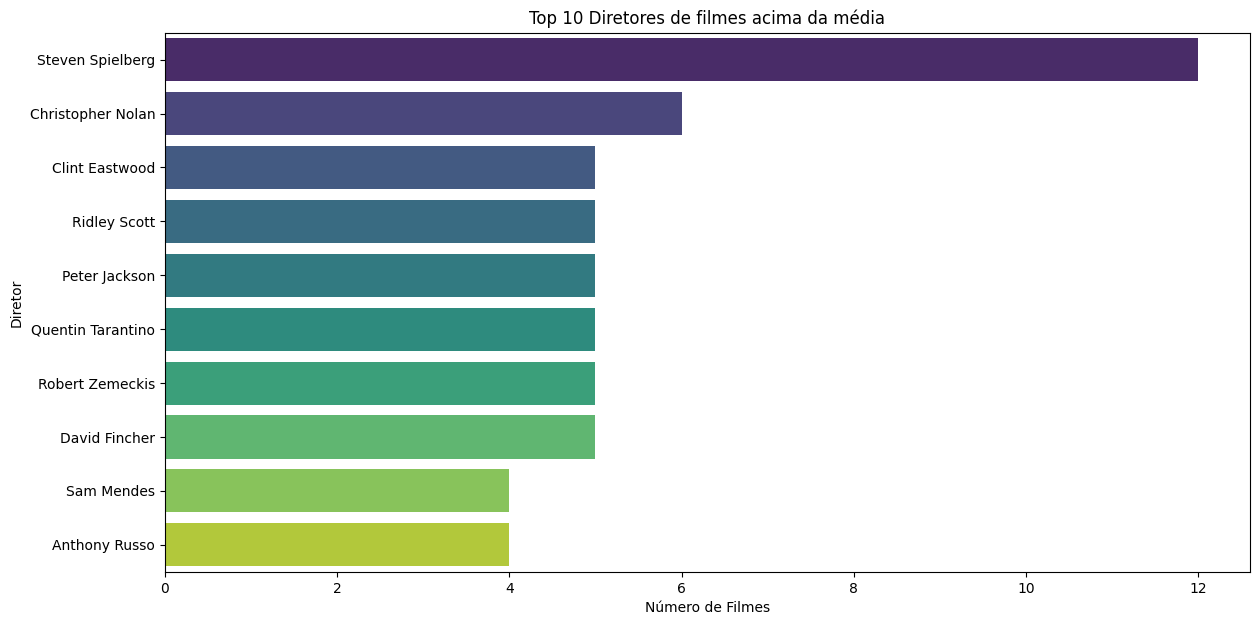

In [2341]:
# Gráfico dos Top 10 Diretores
plt.figure(figsize=(14, 7))
sns.barplot(x=top_directors.values, y=top_directors.index, hue=top_directors.index, palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Diretores de filmes acima da média')
plt.xlabel('Número de Filmes')
plt.ylabel('Diretor')
plt.show()

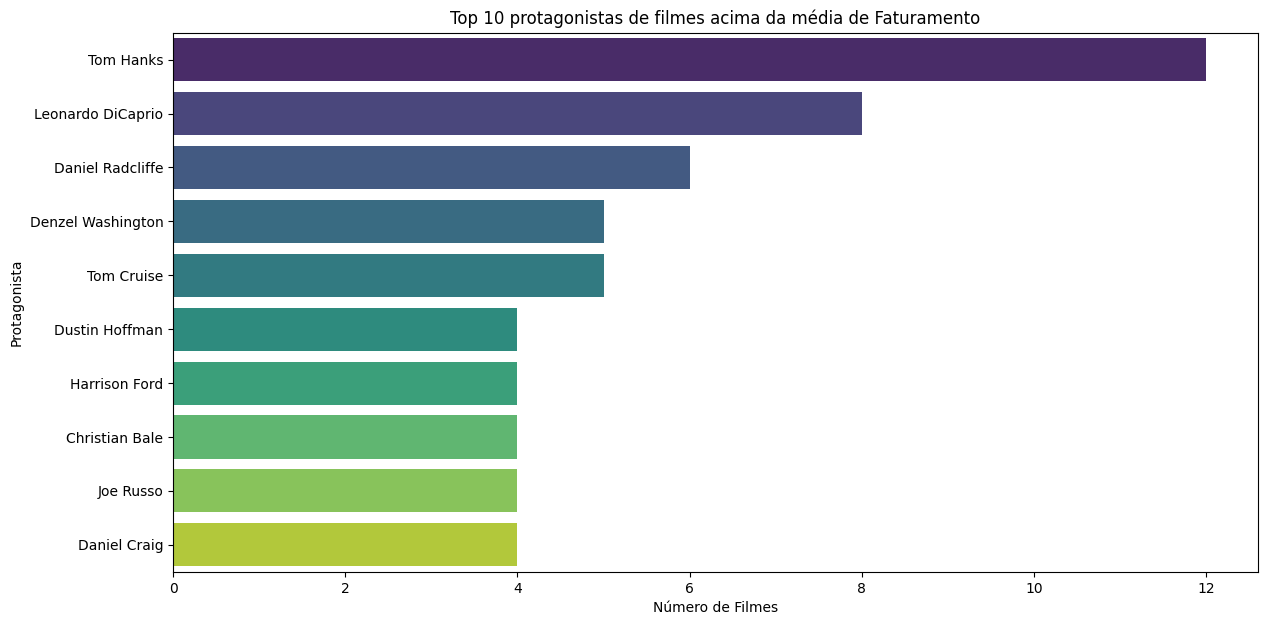

In [2342]:
# Gráfico dos Top 10 Atores Principais
plt.figure(figsize=(14, 7))
sns.barplot(x=top_actors.values, y=top_actors.index, hue=top_actors.index, palette='viridis', dodge=False, legend=False)
plt.title('Top 10 protagonistas de filmes acima da média de Faturamento')
plt.xlabel('Número de Filmes')
plt.ylabel('Protagonista')
plt.show()

**OBS:** Joe Russo na verdade é Diretor, e famoso pela franquia Os Vingadores, da Marvel Studios.

## Conclusões pós-análise: 
### #1 - Filmes mais populares tendem a gerar mais receita!
Através de análise gráfica e matemática, foi possível concluir que filmes mais populares (com maior número de votos) possuem maior expectativa de faturamento!

### #2 - Gêneros importam!
Foi possível concluir em nossa análise que os gêneros que mais aparecem em filmes com bom faturamento são **Drama, Aventura e Ação**!
Além disso, filmes que fazem boas combinações de gênero tendem a ser mais lucrativos.

### #3 - Diretores e Elenco estão relacionados à alta expectativa de sucesso!
Após analisar a lista de filmes acima da média de faturamento de nosso banco de dados, foi possível concluir que diretores renomados como **Steven Spielsberg**, diretor de filmes como **A Lista de Schindler** e **E.T**, atores com histórico de sucessos como **Tom Hanks** e **Leonardo DiCaprio** levam em seu nome o poder de atrair público para novos projetos.

## Sucessos de bilheteria
**Blockbuster** é uma palavra de origem inglesa que indica um filme (ou outra expressão artística) produzido de forma exímia, sendo popular para muitas pessoas e que pode obter elevado sucesso financeiro.

Se você não é muito ligado à filmes, baseado em nosso banco de dados e em cada nota do IMDB, abaixo deixaremos algumas **recomendações** de **Blockbusters**, mas o que leva esse tipo de filme ao sucesso?

In [2348]:
higher_ranked = imdb_data[['Series_Title', 'Overview', 'Genre', 'IMDB_Rating']]

higher_ranked.head(5)

,Series_Title,Overview,Genre,IMDB_Rating
0,The Godfather,An organized crime dynasty's aging patriarch t...,"Crime, Drama",9.2
1,The Dark Knight,When the menace known as the Joker wreaks havo...,"Action, Crime, Drama",9.0
2,The Godfather: Part II,The early life and career of Vito Corleone in ...,"Crime, Drama",9.0
3,12 Angry Men,A jury holdout attempts to prevent a miscarria...,"Crime, Drama",9.0
4,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,"Action, Adventure, Drama",8.9


### Inovação
Mesmo em épocas distintas, filmes como **Tubarão** e **Avatar** se aproveitaram de soluções inovadoras para entrar em nossa lista de Blockbusters. **Tubarão**, dirigido por **Steven Spielberg** e lançado em 1975, utilizou de uma estratégia inovadora de marketing e lançou seu filme em diversos cinemas ao redor do mundo ao mesmo tempo, prática nada comum na época. Já **Avatar**, lançado em 2009, foi o primeiro filme a utilizar a tecnologia 3D, e assim se tornando por bom tempo o maior blockbuster da história.

### Franquias
O maior blockbuster de todos os tempos, **Vingadores: Ultimato**, foi o final de um ciclo construido ao passar de muitos anos pela Marvel Studios, que dedicou muito tempo, esforço e dinheiro para dar um final emocionante para o arco dos primeiros Vingadores, ultrapassando a marca de US$ 2,797 bilhões. Franquias e sequências bem construidas levaram filmes como Batman, Vingadores e Star Wars ao sucesso de bilheteria mundial

### Análise de Sentimentos com a coluna "Overview"
Utilizando as bibliotecas NLTK e Vader vamos tentar gerar insights de algum Overview de filme utilizando análise de sentimentos.

In [2351]:
analyzer = SentimentIntensityAnalyzer()
imdb_data = pd.concat([imdb_data, sentiment_df], axis=1)

def classify_sentiment(score):
    if score >= 0.05:
        return 'A descrição sugere um filme feliz ou inspirador!'
    elif score <= -0.05:
        return 'A descrição sugere um filme triste ou sombrio!'
    else:
        return 'A descrição sugere um filme neutro ou equilibrado.'

sentiment_class = classify_sentiment(sentiment_scores['compound'])

print(f"Overview: {taken_overview}")
print("Sentiment Scores:", sentiment_scores)
print("Sentiment Class:", sentiment_class)

Overview: An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.
Sentiment Scores: {'neg': 0.282, 'neu': 0.718, 'pos': 0.0, 'compound': -0.6705}
Sentiment Class: A descrição sugere um filme triste ou sombrio!


## Previsão de IMDB_Rating utilizando Regressão Linear


A seguir criaremos um modelo de Regressão Linear para um problema de regressão, buscando descobrir a nota do IMDB de um filme (IMDB_Rating) a partir de suas características.

As variáveis utilizadas serão algumas das colunas da nossa tabela do banco de dados: 'Gross', 'Meta_score', 'Runtime', 'No_of_Votes', 'Certificate' e'Genre'.

O modelo de Regressão Linear é simples e eficaz, porém pode ter dificuldades com relações complexas entre variáveis.

Como medida de performance do modelo utilizamos o Erro Quadrático Médio (MSE), por ser o mais utilizado para Regressão, além do R² Score, por ser fácil de interpretar e adequado para nossa situação.

In [2354]:
genre_dummies = imdb_data['Genre'].str.get_dummies(sep=', ')

certificate_dummies = pd.get_dummies(imdb_data['Certificate'], prefix='Cert')

imdb_data = pd.concat([imdb_data, genre_dummies, certificate_dummies], axis=1)

features = ['Gross', 'Meta_score', 'Runtime', 'No_of_Votes'] + list(genre_dummies.columns) + list(certificate_dummies.columns)
X = imdb_data[features]
y = imdb_data['IMDB_Rating']

categorical_features = list(certificate_dummies.columns)
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_encoder.fit(X[categorical_features])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Gross', 'Meta_score', 'Runtime', 'No_of_Votes']),
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 7.3171943745099305e+22
R^2 Score: -8.618214496603944e+23


## Hora do teste!
Vamos testar nosso modelo de Regressão Linear utilizando o filme com as seguintes características:

In [2356]:
new_movie = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

imdb_rating_prediction = pipeline.predict(features_new)

print(f"A previsão do IMDB_Rating de '{new_movie['Series_Title']}' é: {imdb_rating_prediction[0]:.2f}")

A previsão do IMDB_Rating de 'The Shawshank Redemption' é: 9.30


## Conclusão
Após detalhada e diversificada análise de dados através do banco de dados cinematográfico, podemos concluir que para seu próximo filme a PProductions:
- Explore gêneros mais lucrativos como Ação, Aventura, Ficção Científica, ou uma combinação dos mesmos;
- Invista em diretores com histórico de sucesso na carreira;
- Diversifique seu elenco de atores, buscando atrair diversos públicos;
- Invista em estratégias de publicidade para trazer visibilidade e consequentemente lucro ao filme.